In [62]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import time, pickle, os

In [63]:
def chooseAction(state, qTable, isTraining, env, epsilon):
    action = 0
    if isTraining and np.random.uniform(0,1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(qTable[state, :])
    return action

In [64]:
def updateQTable(state, action, newState, reward, qTable, lr, gamma):
    currentQ = qTable[state, action]
    newMaxQ = np.max(qTable[newState, :])
    #newMaxQ = np.argmax(qTable[newState, :])
    qTable[state, action] = currentQ + lr*(reward + gamma*newMaxQ - currentQ)
    return qTable

In [65]:
def runQLearning(totalEpisodes, mapSize = "4x4", isTraining = True, render = False):
    
    # Creating the environment
    env = gym.make("FrozenLake-v1", map_name = mapSize, is_slippery = False, render_mode = 'human' if render else None)
    
    # Initialize Q-Table
    if isTraining:
        qTable = np.random.uniform(low = 0, high = 1, size = (env.observation_space.n, env.action_space.n)) # Q(s,a) initialized randomly
        #qTable = np.zeros((env.observation_space.n, env.action_space.n)) # Q(s,a) initialized with zeros
    else:
        # Load trained model Q-Table
        f = open('frozenLake_qTable_Q_Learning.pk1', 'rb')
        qTable = pickle.load(f)
        f.close()

    # Defining rates & factors
    epsilon = 1 # Epsilon greedy factor
    #minEpsilon = .1
    #maxEpsilon = 1
    epsilonDecayRate = .0001
    lr = .9 # Learning rate
    gamma = .9 # Discount factor

    rewards = np.zeros(totalEpisodes)
    stepsPerEpisode = np.zeros(totalEpisodes)

    # Start

    for episode in range(totalEpisodes):

        steps = 0

        if isTraining:
            print("Episode: " + str(episode))
        else:
            print("Starting attempt...")
        
        terminated = False
        truncated = False

        state = env.reset()[0]
        
        while (not terminated and not truncated):

            action = chooseAction(state, qTable, isTraining, env, epsilon)
            
            newState, reward, terminated, truncated, _ = env.step(action)

            if isTraining:
                updateQTable(state, action, newState, reward, qTable, lr, gamma)

            state = newState

            steps += 1

        #epsilon = minEpsilon + (maxEpsilon - minEpsilon) * np.exp(-epsilonDecayRate * episode)
        epsilon = max(epsilon - epsilonDecayRate, 0)

        # Stabilizing Q-Table when exploration has finished
        if(epsilon == 0):
            lr = .0001
     
        if reward == 1:
            rewards[episode] = 1

        if episode % 500 == 0:
            stepsPerEpisode[episode] = steps
   
    env.close()

    if isTraining:
        print("Training completed. Environment closed")
    else:
        print("Attempt finished, total steps: " + str(steps))

    # Graphics
    sumRewards = np.zeros(totalEpisodes)
    for i in range(totalEpisodes):
        sumRewards[i] = np.sum(rewards[max(0, i-100):(i+1)]) #Rewards every 100 episodes
    if isTraining:
        figure, (ax1, ax2) = plt.subplots(1,2)
        ax1.plot(sumRewards)
        ax1.set_title("Sum of rewards")
        ax1.set_xlabel("Episodes")
        ax1.grid(True)
        ax2.plot(stepsPerEpisode)
        ax2.set_title("Steps per episode")
        ax2.set_xlabel("Episodes")
        ax2.grid(True)
        plt.savefig("frozenLake_QLearning_graphics.png")

    #print(qTable)

    # Saving the Q-Table after the training
    if isTraining:
        with open("frozenLake_qTable_Q_Learning.pk1", 'wb') as f:
            pickle.dump(qTable, f)

Episode: 0
Episode: 1
Episode: 2
Episode: 3
Episode: 4
Episode: 5
Episode: 6
Episode: 7
Episode: 8
Episode: 9
Episode: 10
Episode: 11
Episode: 12
Episode: 13
Episode: 14
Episode: 15
Episode: 16
Episode: 17
Episode: 18
Episode: 19
Episode: 20
Episode: 21
Episode: 22
Episode: 23
Episode: 24
Episode: 25
Episode: 26
Episode: 27
Episode: 28
Episode: 29
Episode: 30
Episode: 31
Episode: 32
Episode: 33
Episode: 34
Episode: 35
Episode: 36
Episode: 37
Episode: 38
Episode: 39
Episode: 40
Episode: 41
Episode: 42
Episode: 43
Episode: 44
Episode: 45
Episode: 46
Episode: 47
Episode: 48
Episode: 49
Episode: 50
Episode: 51
Episode: 52
Episode: 53
Episode: 54
Episode: 55
Episode: 56
Episode: 57
Episode: 58
Episode: 59
Episode: 60
Episode: 61
Episode: 62
Episode: 63
Episode: 64
Episode: 65
Episode: 66
Episode: 67
Episode: 68
Episode: 69
Episode: 70
Episode: 71
Episode: 72
Episode: 73
Episode: 74
Episode: 75
Episode: 76
Episode: 77
Episode: 78
Episode: 79
Episode: 80
Episode: 81
Episode: 82
Episode: 83
Ep

c:\Users\Windows\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 1741
Episode: 1742
Episode: 1743
Episode: 1744
Episode: 1745
Episode: 1746
Episode: 1747
Episode: 1748
Episode: 1749
Episode: 1750
Episode: 1751
Episode: 1752
Episode: 1753
Episode: 1754
Episode: 1755
Episode: 1756
Episode: 1757
Episode: 1758
Episode: 1759
Episode: 1760
Episode: 1761
Episode: 1762
Episode: 1763
Episode: 1764
Episode: 1765
Episode: 1766
Episode: 1767
Episode: 1768
Episode: 1769
Episode: 1770
Episode: 1771
Episode: 1772
Episode: 1773
Episode: 1774
Episode: 1775
Episode: 1776
Episode: 1777
Episode: 1778
Episode: 1779
Episode: 1780
Episode: 1781
Episode: 1782
Episode: 1783
Episode: 1784
Episode: 1785
Episode: 1786
Episode: 1787
Episode: 1788
Episode: 1789
Episode: 1790
Episode: 1791
Episode: 1792
Episode: 1793
Episode: 1794
Episode: 1795
Episode: 1796
Episode: 1797
Episode: 1798
Episode: 1799
Episode: 1800
Episode: 1801
Episode: 1802
Episode: 1803
Episode: 1804
Episode: 1805
Episode: 1806
Episode: 1807
Episode: 1808
Episode: 1809
Episode: 1810
Episode: 1811
Episod

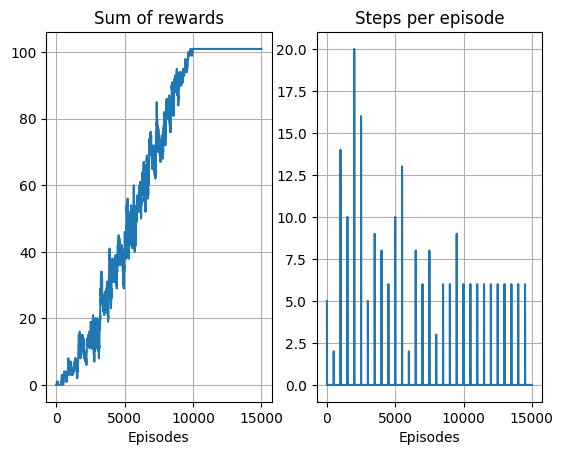

In [66]:

if __name__ == '__main__':
    runQLearning(15000)
    #runQLearning(1, isTraining=False, render=True)